In [21]:
import pandas as pd
import os

In [22]:
data = pd.read_csv("sales.csv")

In [23]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [24]:
type(data.Branch)

pandas.core.series.Series

In [25]:
type(data['Branch'])

pandas.core.series.Series

In [26]:
nan_df = data[data.isna().any(axis = 'columns')]
display(nan_df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [27]:
data['Quantity'] = pd.to_numeric(data['Quantity'])
data['Unit price'] = pd.to_numeric(data['Unit price'])
data['Total'] = pd.to_numeric(data['Total'])

In [28]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [29]:
data['Month'] = data['Date'].str[0:1]
data['Month'] = data['Month'].astype('int32')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [33]:
#1. What was the best month for Total(Sales) ? How much was earned that month??

data.groupby(['Month']).sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2
2,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6
3,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9


range(1, 4)


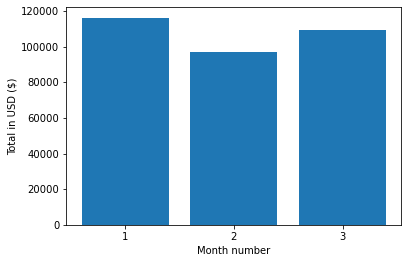

In [35]:
import matplotlib.pyplot as plt

months = range(1,4)
print(months)

plt.bar(months,data.groupby(['Month']).sum()['Total'])
plt.xticks(months)
plt.ylabel('Total in USD ($)')
plt.xlabel('Month number')
plt.show()

In [43]:
#2. Which City sold the most??

data.groupby(['City']).sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
City,,,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,665
Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,640
Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,688


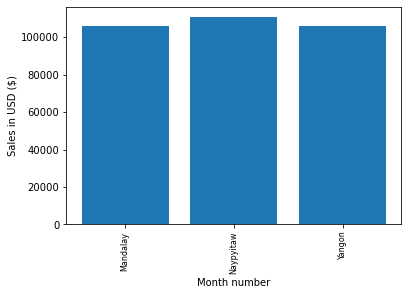

In [39]:
keys = [city for city, df in data.groupby(['City'])]

plt.bar(keys,data.groupby(['City']).sum()['Total'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [45]:
#3.What time should we display advertisements to maximize likelihood of customer's buying product?

data['Hour'] = data['Time'].str[0:2]
data['Hour'] = data['Hour'].astype('int32')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,10


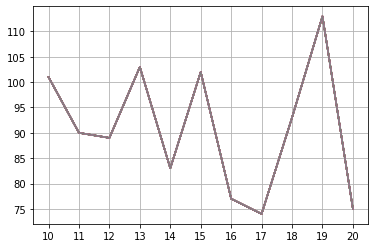

In [47]:
keys = [pair for pair, df in data.groupby(['Hour'])]

plt.plot(keys,data.groupby(['Hour']).count())
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

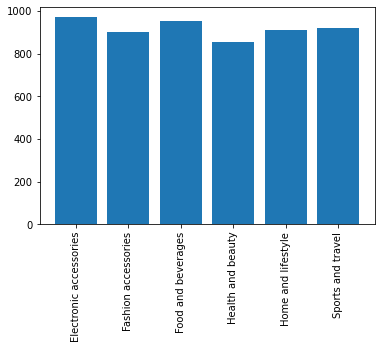

In [56]:
#4. What product sold the most? Why do you think it sold the most?

product_group = data.groupby('Product line')
quantity_ordered = product_group.sum()['Quantity']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

C:\Users\pushw\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


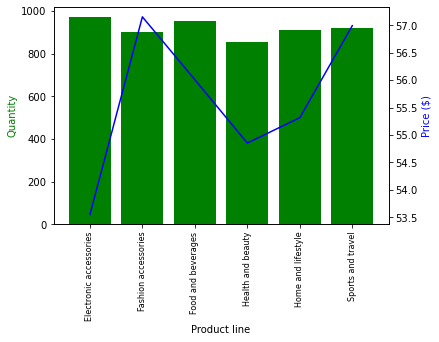

In [58]:
prices = data.groupby('Product line').mean()['Unit price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product line')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()